In [1]:
import numpy as np 
from numpy.random import multivariate_normal as mvn 
# -- nonGaussLike -- 
from nongausslike import nongauss as NG

In [2]:
import matplotlib as mpl 
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

Lets calculate 
$$KL(X_{1:n} || Y_{1:m})$$

The Wang et al. (2009) estimator calculates the KL divergence as: 
$$D(X_{1:n}||Y_{1:m}) = \frac{d}{n}\sum\limits_{i=1}^n \log \frac{\nu_k(i)}{\rho_k(k)} + \log \frac{m}{n-1}$$

In [53]:
d = 8
n = 1000
Cov = np.identity(d) * 5.
X = mvn(np.zeros(d), Cov, size=n)

(-0.2, 0.5)

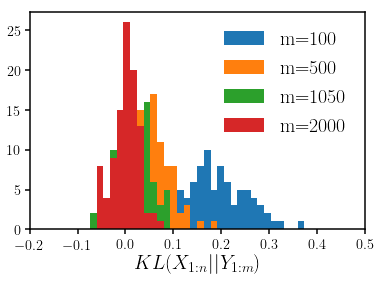

In [4]:
fig = plt.figure()
sub = fig.add_subplot(111)
for m in [100, 500, 1050, 2000]:
    kls = []
    for i in range(100): 
        Y = mvn(np.zeros(d), Cov, size=m)
        kl = NG.kNNdiv_gauss(X, Cov, Knn=2, div_func='kl', gauss=Y)
        kls.append(kl)
    sub.hist(kls, range=(-0.2, 0.5), bins=50, label='m='+str(m))
sub.legend(loc="upper right", fontsize=20)
sub.set_xlabel(r'$KL(X_{1:n} || Y_{1:m})$', fontsize=20)
sub.set_xlim([-0.2, 0.5])

(-0.2, 0.5)

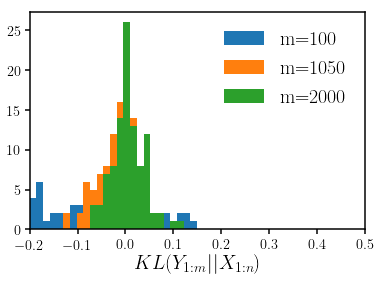

In [5]:
fig = plt.figure()
sub = fig.add_subplot(111)
for m in [100, 1050, 2000]:
    kls = []
    for i in range(100): 
        Y = mvn(np.zeros(d), Cov, size=m)
        kl = NG.kNNdiv_gauss(Y, Cov, Knn=2, div_func='kl', gauss=X)
        kls.append(kl)
    sub.hist(kls, range=(-0.2, 0.5), bins=50, label='m='+str(m))
sub.legend(loc="upper right", fontsize=20)
sub.set_xlabel(r'$KL(Y_{1:m} || X_{1:n})$', fontsize=20)
sub.set_xlim([-0.2, 0.5])

(-0.2, 0.2)

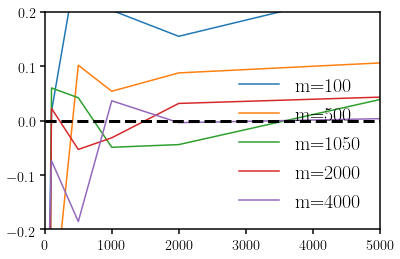

In [66]:
fig = plt.figure()
sub = fig.add_subplot(111)
for m in [100, 500, 1050, 2000, 4000]:
    Y = mvn(np.zeros(d), Cov, size=m)
    kls = []
    for n in [10, 100, 500, 1000, 2000, 5000]: 
        X = mvn(np.zeros(d), Cov, size=n)
        kl = 0.
        for i in range(5): 
            kl += NG.kNNdiv_gauss(X, Cov, Knn=2, div_func='kl', gauss=Y)
        kls.append(kl/5.)
    sub.plot([10, 100, 500, 1000, 2000, 5000], kls, label='m='+str(m))
sub.plot([0., 5000.], [0., 0.], c='k', lw=3, ls='--')
sub.legend(loc="lower right", fontsize=20)
sub.set_xlim([0., 5000.])
sub.set_ylim([-0.2, 0.2])
#sub.set_xlabel(r'$KL(X_{1:n} || Y_{1:m})$', fontsize=20)

(0.0, 4000.0)

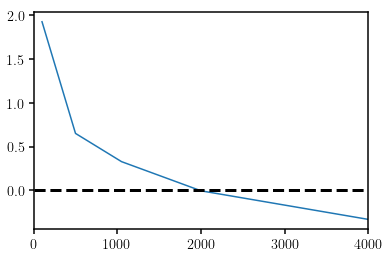

In [74]:
n = 2000
d = 37 
Cov = np.identity(d) * 5.
X = mvn(np.zeros(d), Cov, size=n)

fig = plt.figure()
sub = fig.add_subplot(111)
kls = []
for m in [100, 500, 1050, 2000, 4000]:
    Y = mvn(np.zeros(d), Cov, size=m)
    kl = 0.
    for i in range(5): 
        kl += NG.kNNdiv_gauss(X, Cov, Knn=2, div_func='kl', gauss=Y)
    kls.append(kl/5.)
sub.plot([100, 500, 1050, 2000, 4000], kls)
sub.plot([0., 5000.], [0., 0.], c='k', lw=3, ls='--')
sub.legend(loc="lower right", fontsize=20)
sub.set_xlim([0., 4000.])
#sub.set_xlabel(r'$KL(X_{1:n} || Y_{1:m})$', fontsize=20)

There's clearly a dependence on $m$ of the reference sample in the accuracy of the KL divergence estimator. Now lets try for the more realistic $P(k)$ situation

In [8]:
X_pk = NG.X_pk_all('patchy.z1', NorS='ngc', sys='fc')
X_res, _ = NG.meansub(X_pk)
X_w, W = NG.whiten(X_res)
C_x = np.cov(X_w.T)

In [13]:
dim = X_pk.shape[1]

In [16]:
kl_dict = {}
for m in [1000, 2000, 4000]: 
    kls = []
    for i in range(100): 
        Y = mvn(np.zeros(dim), C_x, size=m)
        kl = NG.kNNdiv_gauss(X_w, C_x, Knn=10, div_func='kl', gauss=Y)
        kls.append(kl)
    kl_dict[m] = kls 

In [41]:
for m in [500]:
    kls = []
    for i in range(100): 
        Y = mvn(np.zeros(dim), C_x, size=m)
        kl = NG.kNNdiv_gauss(X_w, C_x, Knn=10, div_func='kl', gauss=Y)
        kls.append(kl)
    kl_dict[m] = kls

In [23]:
kl_XY_gauss = {}
X_w_gauss = mvn(np.zeros(dim), C_x, size=n)
for m in [1000, 2000, 4000]: 
    kls = []
    for i in range(100): 
        Y = mvn(np.zeros(dim), C_x, size=m)
        kl = NG.kNNdiv_gauss(X_w_gauss, C_x, Knn=10, div_func='kl', gauss=Y)
        kls.append(kl)
    kl_XY_gauss[m] = kls 

In [42]:
for m in [500]: 
    kls = []
    for i in range(100): 
        Y = mvn(np.zeros(dim), C_x, size=m)
        kl = NG.kNNdiv_gauss(X_w_gauss, C_x, Knn=10, div_func='kl', gauss=Y)
        kls.append(kl)
    kl_XY_gauss[m] = kls 

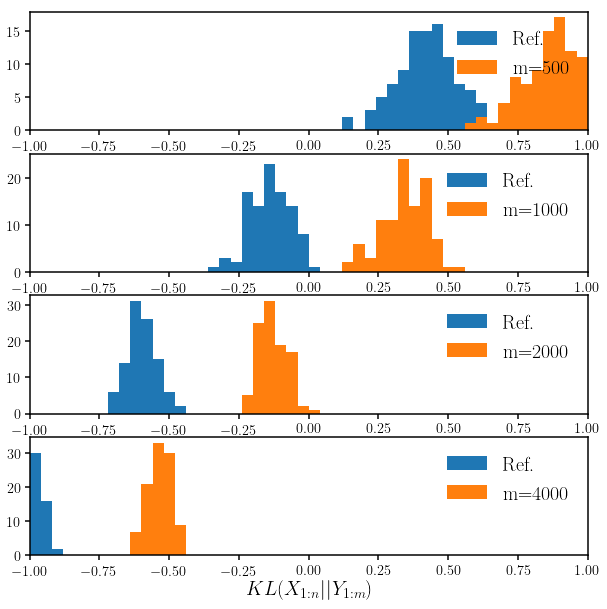

In [44]:
fig = plt.figure(figsize=(10,10))
for i_m, m in enumerate([500, 1000, 2000, 4000]):
    sub = fig.add_subplot(4,1,i_m+1)
    sub.hist(kl_XY_gauss[m], range=(-1, 1), bins=50, color='C0', label='Ref.')
    sub.hist(kl_dict[m], range=(-1, 1), bins=50, color='C1', label='m='+str(m))
    sub.legend(loc="upper right", fontsize=20)
    sub.set_xlabel(r'$KL(X_{1:n} || Y_{1:m})$', fontsize=20)
    sub.set_xlim([-1, 1])

(0.0, 4000.0)

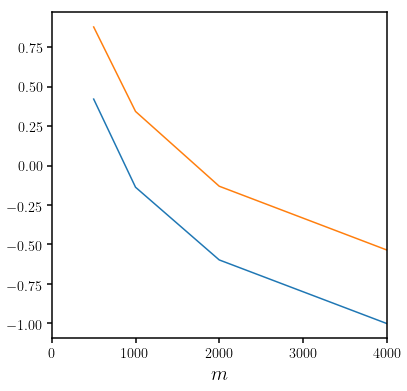

In [67]:
fig = plt.figure(figsize=(6,6))
sub = fig.add_subplot(111)
avgkl_XY_gauss = []
avgkl_XY = [] 
for i_m, m in enumerate([500, 1000, 2000, 4000]):
    avgkl_XY_gauss.append(np.average(kl_XY_gauss[m]))
    avgkl_XY.append(np.average(kl_dict[m]))
sub.plot([500, 1000, 2000, 4000], avgkl_XY_gauss, c='C0')
sub.plot([500, 1000, 2000, 4000], avgkl_XY, c='C1')
sub.legend(loc="upper right", fontsize=20)
sub.set_xlabel(r'$m$', fontsize=20)
sub.set_xlim([0., 4000.])

In [18]:
kl_YX = {}
for m in [1000, 2000, 4000]: 
    kls = []
    for i in range(100): 
        Y = mvn(np.zeros(dim), C_x, size=m)
        kl = NG.kNNdiv_gauss(Y, C_x, Knn=10, div_func='kl', gauss=X_w)
        kls.append(klj
    kl_YX[m] = kls 

In [21]:
kl_YX_gauss = {}
X_w_gauss = mvn(np.zeros(dim), C_x, size=n)
for m in [1000, 2000, 4000]: 
    kls = []
    for i in range(100): 
        Y = mvn(np.zeros(dim), C_x, size=m)
        kl = NG.kNNdiv_gauss(Y, C_x, Knn=10, div_func='kl', gauss=X_w_gauss)
        kls.append(kl)
    kl_YX_gauss[m] = kls 

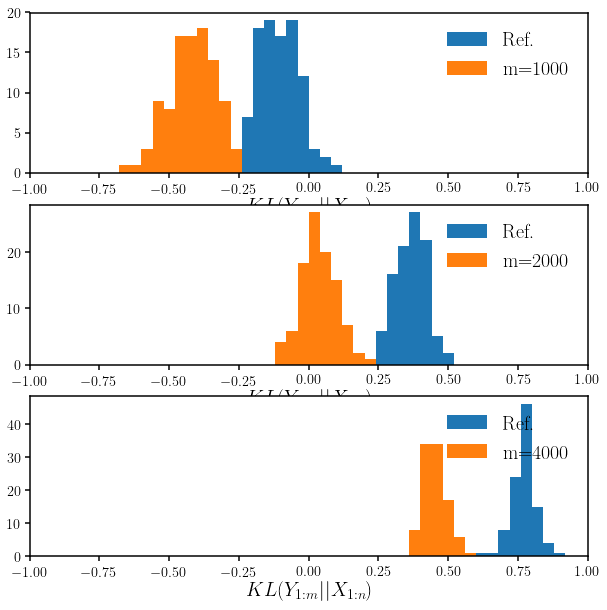

In [40]:
fig = plt.figure(figsize=(10,10))
for i_m, m in enumerate([1000, 2000, 4000]):
    sub = fig.add_subplot(3,1,i_m+1)
    sub.hist(kl_YX_gauss[m], range=(-1., 1.), bins=50, color='C0', label='Ref.')
    sub.hist(kl_YX[m], range=(-1., 1.), bins=50, color='C1', label='m='+str(m))
    sub.legend(loc="upper right", fontsize=20)
    sub.set_xlabel(r'$KL(Y_{1:m} || X_{1:n})$', fontsize=20)
    sub.set_xlim([-1, 1])

In [45]:
from scipy.special import digamma

(-10.0, 100.0)

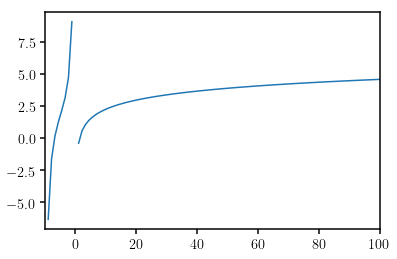

In [75]:
plt.plot(np.linspace(-10., 100., 100), digamma(np.linspace(-10., 100., 100)))
plt.xlim([-10., 100.])